# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3. Create Visualizations
##### Sampling Data
##### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
##### Check whether there's a connection between age and family situation
##### Check whether there’s a connection between age and spending power (income)
### 4. Export Visualizations

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Data

In [2]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
#Create data frame for the "ords_prods_cust_merge" data set
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
ords_prods_cust_merge.shape

(32404859, 30)

# 3. Create Visualizations

[[Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')]]

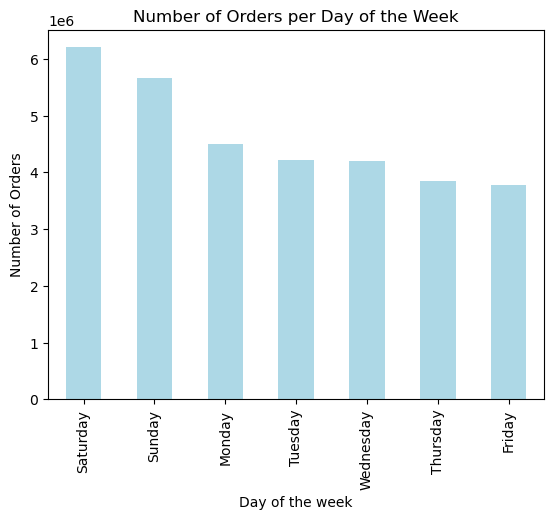

In [5]:
#Creating a bar chart for the “orders_day_of_week” column
bar_chart1 = ords_prods_cust_merge['orders_day_of_week'].value_counts().plot.bar(color='lightblue', xlabel='Day of the week', ylabel='Number of Orders',title='Number of Orders per Day of the Week')
bar_chart1.set(xticklabels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

The values for the days (0 being Saturday, 1 being Sunday, etc.) were replaced by the name of the day on the bar chart, in order to make the chart easier to read.

### Sampling Data

In [7]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [8]:
#Store 70% of the sample in the dataframe named big
big= ords_prods_cust_merge[dev]

In [9]:
#Store 30% of the sample in the dataframe named small
small= ords_prods_cust_merge[~dev]

In [10]:
#Check the length of the original dataframe
len(ords_prods_cust_merge)

32404859

In [11]:
#Check the length of the two samples
len(small)+len(big)

32404859

In [12]:
#select only the relevant columns
subset1 = small[['orders_day_of_week','prices']]

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Day of the Week'),
 Text(0, 0.5, 'Revenue from Orders'),
 Text(0.5, 1.0, 'Revenue from Orders per Day of the Week')]

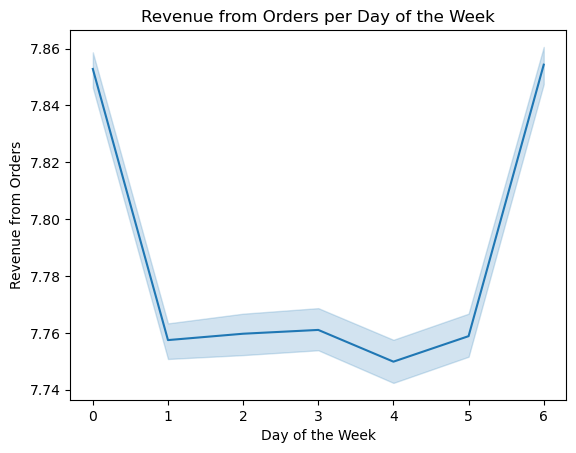

In [13]:
#Create line chart
line = sns.lineplot(data = subset1, x = 'orders_day_of_week',y = 'prices')
line.set(xlabel='Day of the Week', ylabel='Revenue from Orders', title='Revenue from Orders per Day of the Week')

The shaded area represents the confidence interval (95%), as this line chart was based on a sample of the data.

In [14]:
ords_prods_cust_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

C:\Users\manev\AppData\Local\Temp\ipykernel_9624\814246605.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist2.set(yticklabels=['0', '500000', '1000000', '1500000', '2000000', '2500000'], xlabel='hour of the day', ylabel='Number of items purchased', title='Busiest hour of the day in terms of items purchased')


[[Text(0, 0.0, '0'),
  Text(0, 500000.0, '500000'),
  Text(0, 1000000.0, '1000000'),
  Text(0, 1500000.0, '1500000'),
  Text(0, 2000000.0, '2000000'),
  Text(0, 2500000.0, '2500000'),
  Text(0, 3000000.0, '')],
 Text(0.5, 0, 'hour of the day'),
 Text(0, 0.5, 'Number of items purchased'),
 Text(0.5, 1.0, 'Busiest hour of the day in terms of items purchased')]

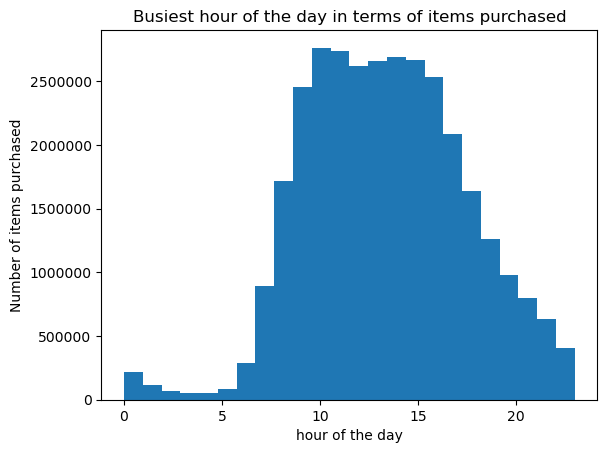

In [15]:
#Create a histogram of the “order_hour_of_day” column
hist2 = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24)
hist2.set(yticklabels=['0', '500000', '1000000', '1500000', '2000000', '2500000'], xlabel='hour of the day', ylabel='Number of items purchased', title='Busiest hour of the day in terms of items purchased')

This histogram shows that the hours between 0h and 6h are the least busy in terms of orders. It also shows that 10h is the busiest hour in terms of orders.
The labels of the y-axis were renamed, as they were originally showing values in scientific notation.

In [16]:
ords_prods_cust_merge['frequency_flag'].value_counts()

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
nan                             5
Name: count, dtype: int64

C:\Users\manev\AppData\Local\Temp\ipykernel_9624\2996373290.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_chart2.set(yticklabels=['0', '5000000', '10000000', '15000000', '20000000'],xlabel='Type of Customer', ylabel='Number of Items Purchased', title='Number of Items Purchased per Customer Type(frequency)')


[[Text(0, 0.0, '0'),
  Text(0, 5000000.0, '5000000'),
  Text(0, 10000000.0, '10000000'),
  Text(0, 15000000.0, '15000000'),
  Text(0, 20000000.0, '20000000'),
  Text(0, 25000000.0, '')],
 Text(0.5, 0, 'Type of Customer'),
 Text(0, 0.5, 'Number of Items Purchased'),
 Text(0.5, 1.0, 'Number of Items Purchased per Customer Type(frequency)')]

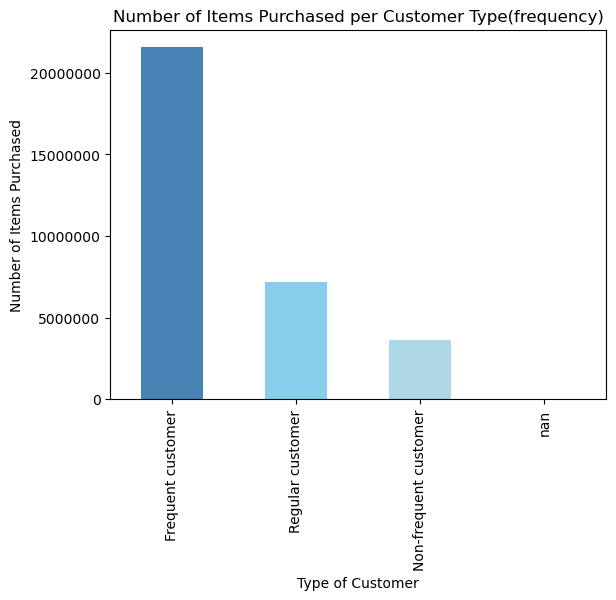

In [17]:
#Creating a bar chart for the “frequency_flag” column
bar_chart2 = ords_prods_cust_merge['frequency_flag'].value_counts().plot.bar(color=['steelblue','skyblue','lightblue'])
bar_chart2.set(yticklabels=['0', '5000000', '10000000', '15000000', '20000000'],xlabel='Type of Customer', ylabel='Number of Items Purchased', title='Number of Items Purchased per Customer Type(frequency)')

The labels of the y-axis were renamed, as they were originally showing values in scientific notation.

In [18]:
ords_prods_cust_merge['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

C:\Users\manev\AppData\Local\Temp\ipykernel_9624\2355840944.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_chart3.set(yticklabels=['0', '2000000', '4000000', '6000000', '8000000', '10000000', '12000000', '14000000', '16000000'], xlabel='Type of Customer', ylabel='Number of Items Purchased', title='Number of Items Purchased per Customer Type(loyalty)')


[[Text(0, 0.0, '0'),
  Text(0, 2000000.0, '2000000'),
  Text(0, 4000000.0, '4000000'),
  Text(0, 6000000.0, '6000000'),
  Text(0, 8000000.0, '8000000'),
  Text(0, 10000000.0, '10000000'),
  Text(0, 12000000.0, '12000000'),
  Text(0, 14000000.0, '14000000'),
  Text(0, 16000000.0, '16000000'),
  Text(0, 18000000.0, '')],
 Text(0.5, 0, 'Type of Customer'),
 Text(0, 0.5, 'Number of Items Purchased'),
 Text(0.5, 1.0, 'Number of Items Purchased per Customer Type(loyalty)')]

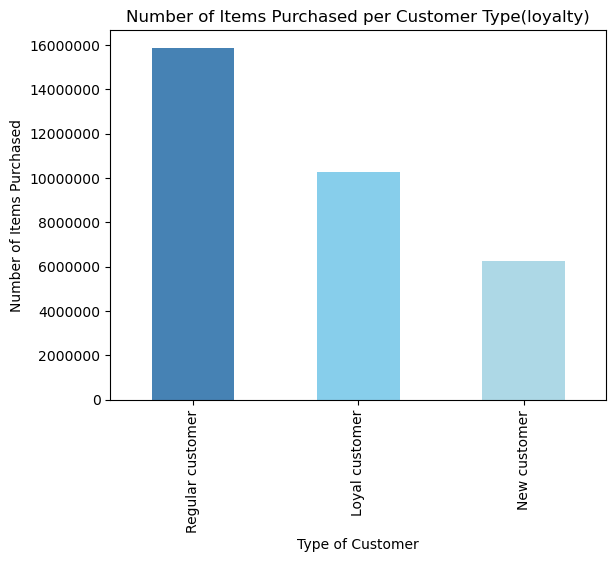

In [19]:
#Creating a bar chart for the “loyalty_flag” column
bar_chart3 = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color=['steelblue','skyblue','lightblue'])
bar_chart3.set(yticklabels=['0', '2000000', '4000000', '6000000', '8000000', '10000000', '12000000', '14000000', '16000000'], xlabel='Type of Customer', ylabel='Number of Items Purchased', title='Number of Items Purchased per Customer Type(loyalty)')

The labels of the y-axis were renamed, as they were originally showing values in scientific notation.

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [23]:
#Select only the relevant columns
subset2 = small[['order_hour_of_day','prices']]

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Hour of the Day'),
 Text(0, 0.5, 'Average Spent Per Item during this Hour'),
 Text(0.5, 1.0, 'Average Expenditure per Hour of the Day')]

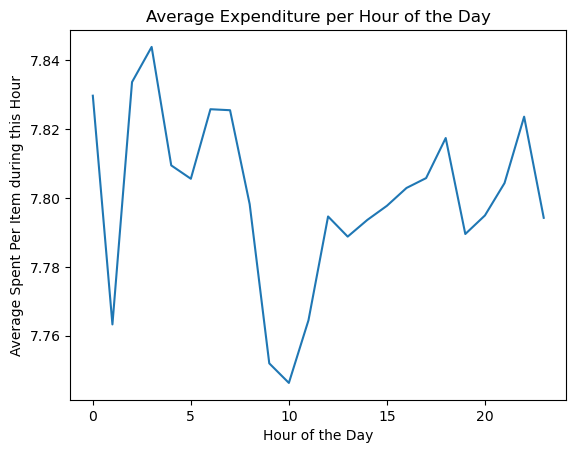

In [24]:
#Create line chart
line1 = sns.lineplot(data = subset2, x = 'order_hour_of_day',y = 'prices', errorbar=None)
line1.set(xlabel='Hour of the Day', ylabel='Average Spent Per Item during this Hour', title='Average Expenditure per Hour of the Day')

There is a difference in expenditure based on the hour of the day. The average price per item purchased each hour shows that customer buy more expensive items a 4h, followed by midnight, 6h, and 7h.(see fig.3) 
We recommend to use the information shown on this line chart with caution, as we previously saw that the hours between 0h and 6h were the ones during which the least amount of orders were made. The average price of expenditure per item between the hour of 0h and 6h may not be representative, as the average prices are calculated on smaller amount of orders. 

#### Check whether there's a connection between age and family situation

In [19]:
#Select only the relevant columns
subset3 = small[['Age','Number_of_Dependants']]

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Age of the Customer'),
 Text(0, 0.5, 'Number of Dependants'),
 Text(0.5, 1.0, 'Number of Dependants (Family Status) per Age of the Customer')]

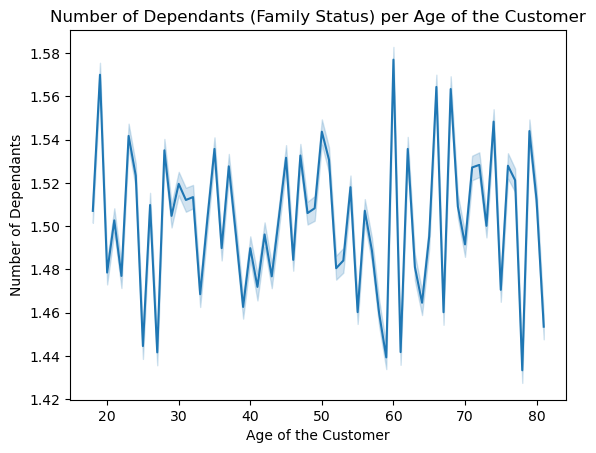

In [21]:
#Create line chart
line2 = sns.lineplot(data = subset3, x = 'Age',y = 'Number_of_Dependants')
line2.set(xlabel='Age of the Customer', ylabel='Number of Dependants', title='Number of Dependants (Family Status) per Age of the Customer')

There doesn't seem to be a strong connection between age and number of dependants.

#### Check whether there’s a connection between age and spending power (income)

[Text(0.5, 1.0, 'Repartition of Spending Power (Income) per Customer Age')]

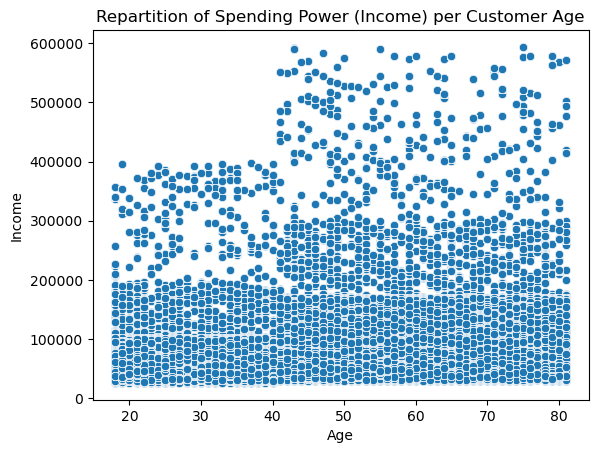

In [22]:
#Creating a scatterplot
scatter_plot1 = sns.scatterplot(x = 'Age', y = 'Income',data = ords_prods_cust_merge)
scatter_plot1.set(title='Repartition of Spending Power (Income) per Customer Age')

There seem to be a connection between age and spending power (income).Incomes above 400000 are only found amongst 40+ years old and we can observe a higher density of points in the 200000 to 300000 income backet for people above 40 years old.

# 4. Export Visualizations

In [ ]:
#Save chart
bar_chart1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow1.png')

In [ ]:
#Save chart
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices1.png')

In [ ]:
#Save line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations')

In [ ]:
#Save histogram 
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations')

In [ ]:
#Save bar chart
bar_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart2.png')

In [ ]:
#Save bar chart
bar_chart3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart3.png')

In [ ]:
#Save line chart
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line1.png')

In [ ]:
#Save line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2.png')

In [ ]:
#Save scatter plot
scatter_plot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot1.png')